# Project: Sentiment Analysis

***Nguyen Thi Tuong Vy***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
from lib_evaluation_regression_model import *
from lib_evaluation_classification_model import *

import warnings
warnings.filterwarnings('ignore')

importing Jupyter notebook from lib_evaluation_regression_model.ipynb
importing Jupyter notebook from lib_evaluation_classification_model.ipynb


**Loading the data**

In [2]:
data = pd.read_csv('data/clean_data_Foody.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38679 entries, 0 to 38678
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         38679 non-null  int64  
 1   restaurant         38679 non-null  object 
 2   review_text        38679 non-null  object 
 3   review_score       38679 non-null  float64
 4   review_text_clean  38679 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


**Categorizing reviews into 2 categories based on review_score: negative and positive**

negative (-1): score between 0 and <8

postive (1): score between 8 and 10

In [4]:
data['sentiment'] = data['review_score'].apply(lambda x: 1 if x>7.9 else -1)

In [5]:
data.head()

,Unnamed: 0,restaurant,review_text,review_score,review_text_clean,sentiment
0,0,Good Morning Restaurant,Pizza phong cách Ý. Ngán hải sản nên cả nhà gh...,8.2,hải_sản ghé rẻ đẹp,1
1,1,Hạt Dẻ Trùng Khánh,- Vị trí: chỉ là 1 chiếc xe nho nhỏ nằm ở khu ...,8.0,đông đối_diện thích hạt_dẻ hẳn chuyên_nghiệp l...,1
2,2,Bột - Healthy & Weight Loss Food - Shop Online,Nay lang thang trên BM thấy đang khuyến mãi xo...,8.2,khuyến_mãi đọc thử đồ_ăn đa_số hơi khô thử,1
3,3,Bánh Giò Chợ Nguyễn Công Trứ,"Quán nằm trong chợ Nguyễn Công Trứ, cũng dễ tì...",8.2,nguyễn_công_trứ thẳng đông lộn ngải_cứu kèm tu...,1
4,4,Quán Quảng - Bún Quảng,Ngãi heo với heo thiệttttt 🐷🐷🐷\n🤤🤤 bún nem chả...,9.0,ngãi thơm kế sò ốc mềm không_thích dầu_mỡ chả_...,1


In [6]:
data.groupby('sentiment').sentiment.count()

sentiment
-1    18478
 1    20201
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment'>

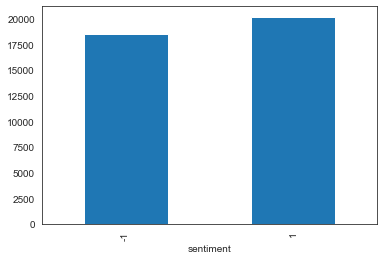

In [7]:
data.groupby('sentiment').sentiment.count().plot.bar(ylim=0)

Nhận xét: Dữ liệu được chia thành 2 nhóm tương đối đồng đều

**Word Clouds**

In [8]:
from wordcloud import WordCloud

In [9]:
negative = data.loc[data['sentiment'] == -1]
positive = data.loc[data['sentiment'] == 1]

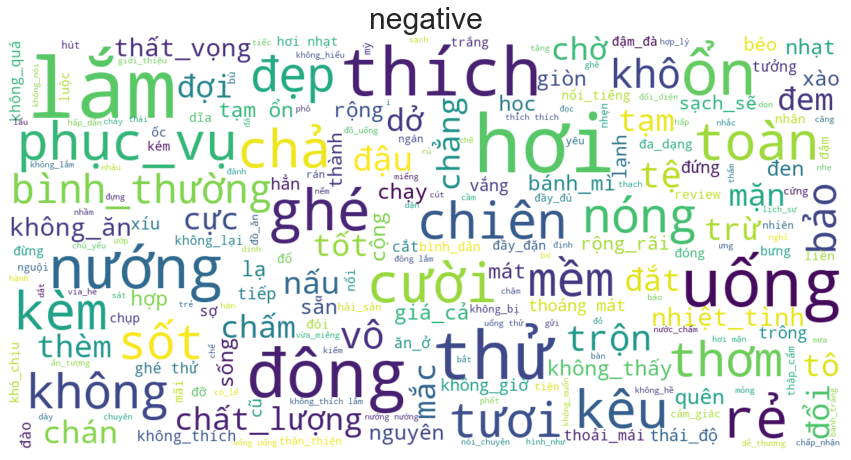

In [10]:
# negative
wc_1 = WordCloud(background_color='white', max_words=1000, max_font_size=40, scale=3, random_state=42)
text_1 =' '.join(negative.iloc[:,4])
wc_1.generate(text_1)
plt.figure(figsize=(15, 15))
plt.imshow(wc_1, interpolation='bilinear')
plt.axis('off')
plt.title('negative', fontsize=30)
plt.savefig('data/negative.png');

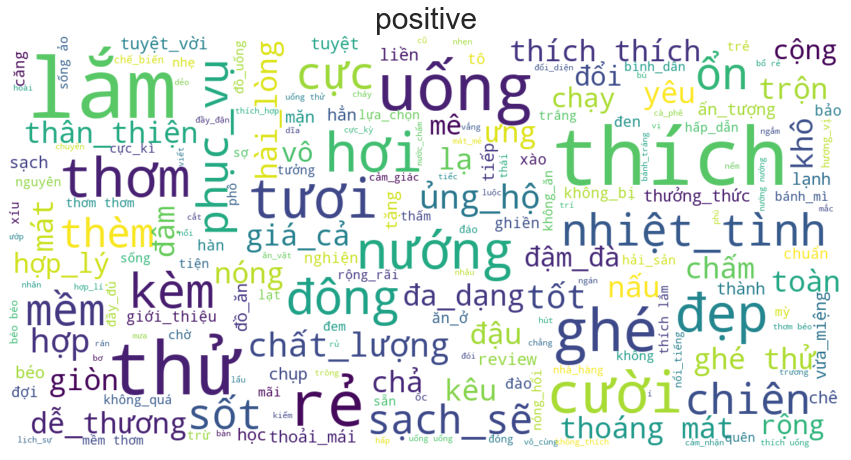

In [11]:
# positive
wc_2 = WordCloud(background_color='white', max_words=1000, max_font_size=40, scale=3, random_state=42)
text_2 =' '.join(positive.iloc[:,4])
wc_2.generate(text_2)
plt.figure(figsize=(15, 15))
plt.imshow(wc_2, interpolation='bilinear')
plt.axis('off')
plt.title('positive', fontsize=30)
plt.savefig('data/positive.png');

**TfidfVectorizer**

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf

TfidfVectorizer()

In [13]:
tfidf.fit(data['review_text_clean'])

TfidfVectorizer()

In [14]:
print(tfidf.get_feature_names())

['aaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaa', 'ablone', 'acb', 'accepted', 'accomodating', 'account', 'accoustic', 'acos', 'acoustics', 'acoutic', 'active', 'actor', 'acười', 'add', 'addicted', 'addition', 'admin', 'adora', 'adorned', 'adua', 'adult', 'advertise', 'advertisement', 'aen', 'aeonmall', 'aesthetic', 'aex', 'affiliate', 'affogato', 'agar', 'aged', 'agedashi', 'agree', 'ahai', 'ahuhu', 'ahx', 'aigoo', 'aikido', 'ain', 'ainthicsh', 'airang', 'airlay', 'airpay', 'airpods', 'ajitsuke', 'akiko', 'alas', 'alf', 'alfresco', 'align', 'alisan', 'alishan', 'alley', 'allows', 'almon', 'almond', 'almost', 'aloe', 'aloha', 'along', 'aloo', 'alpaca', 'alpenliebe', 'alway', 'amant', 'amata', 'amberchill', 'ambiance', 'amz', 'ancathegioi', 'anchovies', 'ancient', 'angeles', 'anhonghanseo', 'anhr', 'anime', 'ankoet', 'annandi', 'annoying', 'ansang', 'ansapsaigon', 'answered', 'ant', 'anti', 'antoi', 'antrua', 'aozora', 'apfree', 'app', 'appetizer', 'approaching', 'apps', 'apyeuthich', 'are'

In [15]:
len(tfidf.get_feature_names())

16938

In [16]:
data_transformed = tfidf.transform(data['review_text_clean']).toarray() 

In [17]:
data_transformed.shape

(38679, 16938)

In [18]:
data_transformed = pd.DataFrame(data_transformed, columns = tfidf.get_feature_names()).add_prefix('tfidf_')

In [19]:
data_transformed.head()

,tfidf_aaaaaaaaaaa,tfidf_aaaaaaaaaaaaaaaaaaaaaaaaaa,tfidf_ablone,tfidf_acb,tfidf_accepted,tfidf_accomodating,tfidf_account,tfidf_accoustic,tfidf_acos,tfidf_acoustics,...,tfidf_ứng_dụng,tfidf_ứng_xử,tfidf_ừ_hử,tfidf_ừa,tfidf_ừm,tfidf_ừng_ực,tfidf_ững,tfidf_ựa,tfidf_ựaaa,tfidf_ực
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
first_row = data_transformed.iloc[0]
first_row.sort_values(ascending = False).head(10)

tfidf_hải_sản          0.677341
tfidf_đẹp              0.461092
tfidf_rẻ               0.425492
tfidf_ghé              0.384135
tfidf_ực               0.000000
tfidf_không_kì_kèo     0.000000
tfidf_không_kì_thị     0.000000
tfidf_không_kì_vọng    0.000000
tfidf_không_kìm        0.000000
tfidf_không_kìm_hãm    0.000000
Name: 0, dtype: float64

In [21]:
data_new = pd.concat([data, data_transformed], axis = 1)
data_new.shape

(38679, 16944)

In [22]:
data_new.head()

,Unnamed: 0,restaurant,review_text,review_score,review_text_clean,sentiment,tfidf_aaaaaaaaaaa,tfidf_aaaaaaaaaaaaaaaaaaaaaaaaaa,tfidf_ablone,tfidf_acb,...,tfidf_ứng_dụng,tfidf_ứng_xử,tfidf_ừ_hử,tfidf_ừa,tfidf_ừm,tfidf_ừng_ực,tfidf_ững,tfidf_ựa,tfidf_ựaaa,tfidf_ực
0,0,Good Morning Restaurant,Pizza phong cách Ý. Ngán hải sản nên cả nhà gh...,8.2,hải_sản ghé rẻ đẹp,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Hạt Dẻ Trùng Khánh,- Vị trí: chỉ là 1 chiếc xe nho nhỏ nằm ở khu ...,8.0,đông đối_diện thích hạt_dẻ hẳn chuyên_nghiệp l...,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Bột - Healthy & Weight Loss Food - Shop Online,Nay lang thang trên BM thấy đang khuyến mãi xo...,8.2,khuyến_mãi đọc thử đồ_ăn đa_số hơi khô thử,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Bánh Giò Chợ Nguyễn Công Trứ,"Quán nằm trong chợ Nguyễn Công Trứ, cũng dễ tì...",8.2,nguyễn_công_trứ thẳng đông lộn ngải_cứu kèm tu...,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Quán Quảng - Bún Quảng,Ngãi heo với heo thiệttttt 🐷🐷🐷\n🤤🤤 bún nem chả...,9.0,ngãi thơm kế sò ốc mềm không_thích dầu_mỡ chả_...,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Split Data**

In [23]:
X = data_transformed
y = data_new['sentiment']

In [24]:
X.head()

,tfidf_aaaaaaaaaaa,tfidf_aaaaaaaaaaaaaaaaaaaaaaaaaa,tfidf_ablone,tfidf_acb,tfidf_accepted,tfidf_accomodating,tfidf_account,tfidf_accoustic,tfidf_acos,tfidf_acoustics,...,tfidf_ứng_dụng,tfidf_ứng_xử,tfidf_ừ_hử,tfidf_ừa,tfidf_ừm,tfidf_ừng_ực,tfidf_ững,tfidf_ựa,tfidf_ựaaa,tfidf_ực
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: sentiment, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Lazy Prediction**

In [34]:
from lazypredict.Supervised import LazyClassifier

In [35]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [3:13:46<00:00, 400.93s/it]


In [36]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.79,0.79,0.79,0.79,425.39
BernoulliNB,0.77,0.77,0.77,0.77,62.65
BaggingClassifier,0.74,0.74,0.74,0.74,599.55
AdaBoostClassifier,0.74,0.74,0.74,0.74,277.78
CalibratedClassifierCV,0.73,0.73,0.73,0.73,4169.35
DecisionTreeClassifier,0.70,0.70,0.70,0.70,110.59
ExtraTreeClassifier,0.67,0.67,0.67,0.67,33.27
KNeighborsClassifier,0.63,0.62,0.62,0.62,5660.92
GaussianNB,0.58,0.57,0.57,0.53,41.92


Nhận xét: Các mô hình trên có thời gian thực thi khá lâu mà kết quả lại không cao (accuracy score < 80%)

=> Cần chọn thêm các mô hình khác

## Naive Bayes - MultinomialNB Model

In [27]:
from sklearn.naive_bayes import MultinomialNB
model_nbm = MultinomialNB()
model_nbm.fit(X_train, y_train)

MultinomialNB()

*Đánh giá Model*

In [28]:
# Trên tập train
print('Train accuracy score: ', model_nbm.score(X_train, y_train))

Train accuracy score:  0.8357948485925735


In [29]:
# Trên tập test
print('Test accuracy score: ', model_nbm.score(X_test, y_test))

Test accuracy score:  0.7810237849017581


Nhận xét: score ở tập train và test đều chưa cao

In [30]:
score, recall, precision, f1 = Static_score_model_class(y_test, model_nbm.predict(X_test), aver='micro')
print(score, recall, precision, f1)

0.7810237849017581 0.7810237849017581 0.7810237849017581 0.7810237849017581


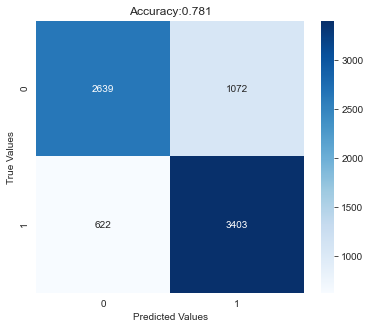

In [31]:
Visualize_confusion_matrix(y_test, model_nbm.predict(X_test))

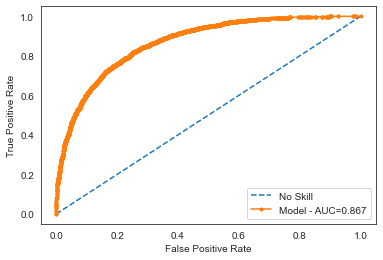

In [32]:
ROC_AUC(y_test, model_nbm.predict_proba(X_test)[:,1])

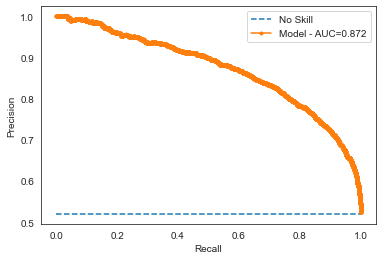

In [33]:
Precision_Recall_AUC(y_test, model_nbm.predict_proba(X_test)[:,1])

In [34]:
Threshold_PrecisionRecall(y_test, model_nbm.predict_proba(X_test)[:,1])

(0.4515188531350073, 0.8022636484687083)

In [35]:
y_prob = model_nbm.predict_proba(X_test)
y_prob

array([[0.53705384, 0.46294616],
       [0.78104975, 0.21895025],
       [0.31120523, 0.68879477],
       ...,
       [0.35341743, 0.64658257],
       [0.29341721, 0.70658279],
       [0.32725471, 0.67274529]])

Dựa trên tất cả các đánh giá
=> Naive Bayes - MultinomialNB Model có thể được cân nhắc

## LogisticRegression Model

In [36]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
print(model_lr.intercept_)
print(model_lr.coef_)

[0.42081437]
[[-0.21084172 -0.12451886 -0.13326341 ...  0.2144875  -0.14253234
   0.44337452]]


In [37]:
# Đánh giá trên tập train:
print('Train accuracy score: ', model_lr.score(X_train, y_train))

Train accuracy score:  0.8387034224218725


In [38]:
score, recall, precision, f1 = Static_score_model_class(y_train, model_lr.predict(X_train),'macro')
print(score, recall, precision, f1)

0.8387034224218725 0.837647182793966 0.8389642122917993 0.838094264614051


In [39]:
# Đánh giá trên tập test:
print('Test accuracy score: ', model_lr.score(X_test, y_test))

Test accuracy score:  0.7973112719751809


In [40]:
score, recall, precision, f1 = Static_score_model_class(y_test, model_lr.predict(X_test),'macro')
print(score, recall, precision, f1)

0.7973112719751809 0.7960728470503171 0.7977391108693672 0.7965081404809636


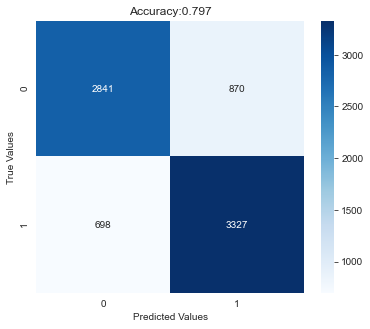

In [41]:
Visualize_confusion_matrix(y_test, model_lr.predict(X_test))

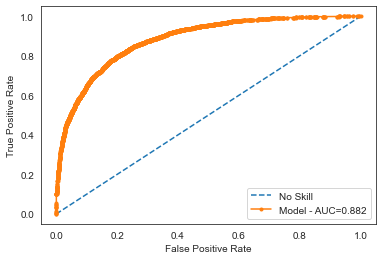

In [42]:
ROC_AUC(y_test, model_lr.predict_proba(X_test)[:,1])

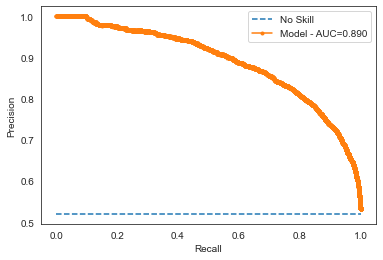

In [43]:
Precision_Recall_AUC(y_test, model_lr.predict_proba(X_test)[:,1])

In [44]:
model_lr.predict_proba(X_test)

array([[0.67315119, 0.32684881],
       [0.9060799 , 0.0939201 ],
       [0.20904583, 0.79095417],
       ...,
       [0.36023282, 0.63976718],
       [0.12485251, 0.87514749],
       [0.36648283, 0.63351717]])

In [45]:
y_proba_lr = model_lr.predict_proba(X_test)[:,1]
y_proba_lr

array([0.32684881, 0.0939201 , 0.79095417, ..., 0.63976718, 0.87514749,
       0.63351717])

Nhận xét: Có thể cân nhắc LogisticRegression Model

## Chọn mô hình

In [48]:
import time

In [46]:
def Average_Score_Model(model, X, y, size=0.1, cv=10):
    score_test = []
    duration = []
    for n in range(1, cv + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size)
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        
        score_test.append(model.score(X_test, y_test))
        duration.append((end-start)*1000)
    return np.mean(score_test), np.mean(duration)

In [49]:
models = [LogisticRegression(), MultinomialNB()]

scores = []
names = []
for model in models:
    scores.append(Average_Score_Model(model, X_train, y_train))
    names.append(model.__class__.__name__)
df = pd.DataFrame(scores, columns=['Score', 'TimeFit'], index=range(len(models)))
df.insert(0, 'Model', pd.Series(names))
df

,Model,Score,TimeFit
0,LogisticRegression,0.794055,20841.735220
1,MultinomialNB,0.779192,1271.958613


**Kết luận chọn model:**
So với các model khác thì Naive Bayes - MultinomialNB cho kết quả khả quan (cao hơn) và thời gian cũng tương đối (không quá lâu). Cho nên mô hình được chọn là Naive Bayes - MultinomialNB và cần tùy chỉnh thêm tham số mô hình.

## Parameters Tuning

***Chọn Mô hình Naive Bayes - MultinomialNB***

In [50]:
grid_params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

*GridSearchCV*

In [51]:
from sklearn.model_selection import GridSearchCV
nbmodel_tune = GridSearchCV(MultinomialNB(), grid_params, cv=5)

In [52]:
start = time.time()
nbmodel_tune.fit(X_train, y_train)
end = time.time()
print('Time (in miliseconds):', (end-start)*1000)

Time (in miliseconds): 74841.97235107422


In [53]:
print(nbmodel_tune.best_score_)
print(nbmodel_tune.best_params_)

0.7789162079687014
{'alpha': 10.0}


In [54]:
y_pred = nbmodel_tune.predict(X_test)

In [55]:
y_pred

array([-1, -1,  1, ...,  1,  1,  1], dtype=int64)

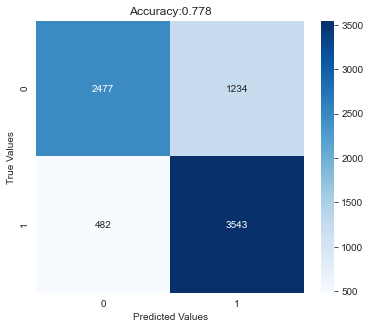

In [56]:
Visualize_confusion_matrix(y_test, y_pred)

*K-Folds*

In [57]:
from sklearn import model_selection
from sklearn.model_selection import KFold
clf_k = MultinomialNB(alpha=0.01)
kfold = KFold(n_splits=10)
results = model_selection.cross_val_score(clf_k, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, 
                                     results.std()*100.0))

Accuracy: 75.97% (0.32%)


In [58]:
results

array([0.75310238, 0.7639607 , 0.75723888, 0.76137539, 0.75827301,
       0.76447777, 0.76189245, 0.7590486 , 0.75879007, 0.75924489])

## Kết luận: Mô hình được chọn là Naive Bayes - MultinomialNB